# <font color = 'orange'> 1. Introduction </font>


### 📌1.1 Importer les libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import date

###### 📌1.2 Importer les DataFrame

In [2]:
customer = pd.read_csv('customers.csv')
product = pd.read_csv('products.csv')
trans = pd.read_csv('transactions.csv')

# <font color = 'orange'> 2. Aperçu </font>


###### 📌2.1 customer

In [3]:
customer.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [5]:
customer.describe(include = 'object')

,client_id,sex
count,8623,8623
unique,8623,2
top,c_4410,f
freq,1,4491


In [6]:
customer.duplicated(subset = 'client_id').unique()

array([False])

<AxesSubplot:>

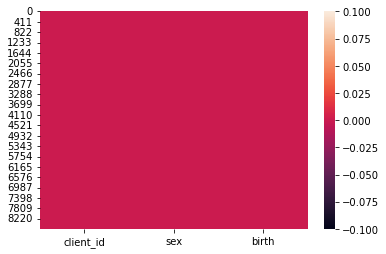

In [7]:
sns.heatmap(customer.isna())

###### 📌2.2 product

In [8]:
product.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [9]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [10]:
product.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


un chiffre aberant se trouve (price min = -1)

In [11]:
product.describe( include = 'object')

,id_prod
count,3287
unique,3287
top,0_1421
freq,1


In [12]:
product[(product['price'] <= 0.000000) ].index

Int64Index([731], dtype='int64')

In [13]:
product['price'].value_counts()

4.99     85
6.99     84
3.99     80
5.99     78
8.99     74
         ..
6.50      1
5.40      1
10.89     1
5.25      1
25.16     1
Name: price, Length: 1455, dtype: int64

In [14]:
product[product['id_prod'] == 'T_0']

,id_prod,price,categ
731,T_0,-1.0,0


<AxesSubplot:>

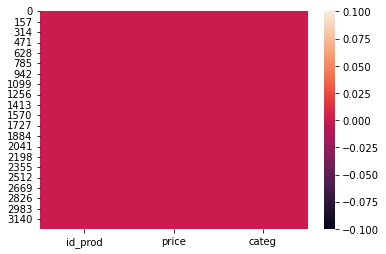

In [15]:
sns.heatmap(product.isna())

In [16]:
product['categ'].value_counts()

0    2309
1     739
2     239
Name: categ, dtype: int64

###### 📌2.3 transaction

In [17]:
trans.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [18]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     337016 non-null  object
 1   date        337016 non-null  object
 2   session_id  337016 non-null  object
 3   client_id   337016 non-null  object
dtypes: object(4)
memory usage: 10.3+ MB


In [19]:
trans.describe(include = 'object')

,id_prod,date,session_id,client_id
count,337016,337016,337016,337016
unique,3266,336855,169195,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,1081,13,200,12855


<AxesSubplot:>

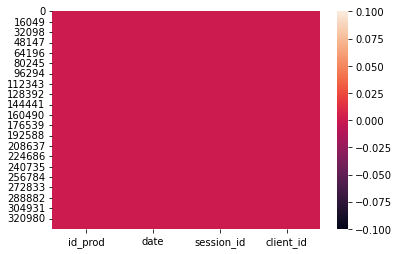

In [20]:
sns.heatmap(trans.isna())

# <font color = 'orange'> 3. Nettoyage </font>


###### 📌3.1 product

In [21]:
product.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [22]:
product[product.price< 0]

,id_prod,price,categ
731,T_0,-1.0,0


✏️Le chiffre négatif n'est pas logique pour le prix.

In [23]:
#product_clean = product[product['id_prod'] != 'T_0']

product = product[product['price'] >= 0.0 ]
product

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [24]:
product[product.id_prod == '0_2245']

,id_prod,price,categ


In [25]:
product.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


###### 📌3.2 transaction

In [26]:
# trouver les rows avec 'test' dans le colonne date
filt = trans[trans['date'].str.contains('test')].index
trans[trans['date'].str.contains('test')]


,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1
...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1


In [27]:
#suprimmer les rows
trans = trans.drop(filt)

trans

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


In [28]:
trans[trans.id_prod == '0_2245']

,id_prod,date,session_id,client_id
6235,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533
10802,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954
14051,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120
17486,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964
21078,0_2245,2021-03-01 00:09:29.301897,s_3,c_580
...,...,...,...,...
322710,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167
329417,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790
330490,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189
335531,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595


In [29]:
# object to datatime
trans['date'] = pd.to_datetime(trans['date'])
trans['date'] 


0        2021-04-10 18:37:28.723910
1        2022-02-03 01:55:53.276402
2        2021-09-23 15:13:46.938559
3        2021-10-17 03:27:18.783634
4        2021-07-17 20:34:25.800563
                    ...            
337011   2021-05-28 12:35:46.214839
337012   2021-06-19 00:19:23.917703
337013   2021-03-16 17:31:59.442007
337014   2021-10-30 16:50:15.997750
337015   2021-06-26 14:38:19.732946
Name: date, Length: 336816, dtype: datetime64[ns]

In [30]:
customer.client_id.value_counts()

c_4410    1
c_5441    1
c_5140    1
c_7935    1
c_7514    1
         ..
c_2797    1
c_818     1
c_3393    1
c_1497    1
c_84      1
Name: client_id, Length: 8623, dtype: int64

# <font color = 'orange'> 4. Transformation </font>


######  📌jointure les dataframes

In [31]:
df_final =  trans.merge(customer,on='client_id', how = 'left').merge(product,on='id_prod', how = 'left') 
df_final

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0
...,...,...,...,...,...,...,...,...
336811,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,31.99,1.0
336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,22.99,0.0
336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,11.03,0.0
336814,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,50.99,2.0


In [32]:
df_final.isna().any()

id_prod       False
date          False
session_id    False
client_id     False
sex           False
birth         False
price          True
categ          True
dtype: bool

In [33]:
df_final.isna().sum()

id_prod         0
date            0
session_id      0
client_id       0
sex             0
birth           0
price         103
categ         103
dtype: int64

In [34]:
# trouver les NaN
df_final[np.isnan(df_final['categ'])]

,id_prod,date,session_id,client_id,sex,birth,price,categ
6231,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,m,1972,NaN,NaN
10797,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,m,1973,NaN,NaN
14045,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,f,1975,NaN,NaN
17480,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,f,1982,NaN,NaN
21071,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,m,1988,NaN,NaN
...,...,...,...,...,...,...,...,...
322523,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,f,1979,NaN,NaN
329226,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,f,1983,NaN,NaN
330297,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,f,1984,NaN,NaN
335331,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,f,1973,NaN,NaN


In [35]:
# Changer les NaN de colonne categ par 0
df_final.categ = np.where(np.isnan(df_final.categ), 0, df_final.categ)
df_final[np.isnan(df_final['price'])]


,id_prod,date,session_id,client_id,sex,birth,price,categ
6231,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,m,1972,NaN,0.0
10797,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,m,1973,NaN,0.0
14045,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,f,1975,NaN,0.0
17480,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,f,1982,NaN,0.0
21071,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,m,1988,NaN,0.0
...,...,...,...,...,...,...,...,...
322523,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,f,1979,NaN,0.0
329226,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,f,1983,NaN,0.0
330297,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,f,1984,NaN,0.0
335331,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,f,1973,NaN,0.0


In [36]:
# Remplacer le NaN de la colonne price pour categ 0 par le médian de prix
categ_0_median =df_final.price[df_final.categ == 0].median()
categ_0_median

9.99

In [37]:
#Remplacer les NaN de price par le median de price de cater 0
df_final.price = np.where(np.isnan(df_final.price), categ_0_median, df_final.price)

In [38]:
df_final

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0
...,...,...,...,...,...,...,...,...
336811,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,31.99,1.0
336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,22.99,0.0
336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,11.03,0.0
336814,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,50.99,2.0


In [39]:
df_final.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
sex           0
birth         0
price         0
categ         0
dtype: int64

In [40]:
df_final.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
sex           0
birth         0
price         0
categ         0
dtype: int64

<AxesSubplot:>

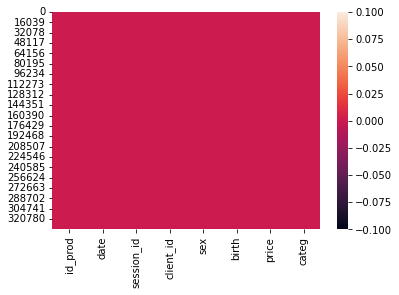

In [41]:
sns.heatmap(df_final.isna())

In [42]:
df_final.describe(include = 'object')

,id_prod,session_id,client_id,sex
count,336816,336816,336816,336816
unique,3265,169194,8600,2
top,1_369,s_118668,c_1609,m
freq,1081,14,12855,169241


In [43]:
df_final.describe()

,birth,price,categ
count,336816.000000,336816.000000,336816.000000
mean,1977.823396,17.212979,0.430024
std,13.523923,17.853162,0.591039
min,1929.000000,0.620000,0.000000
25%,1971.000000,8.610000,0.000000
50%,1980.000000,13.900000,0.000000
75%,1987.000000,18.990000,1.000000
max,2004.000000,300.000000,2.000000


In [44]:
df_final.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
sex           0
birth         0
price         0
categ         0
dtype: int64

###### 📌Créer la colonne d'âge

In [45]:
#int to str
df_final['birth'] = df_final['birth'].apply(str)

# transformer la colonne de birth en age
def age(born):
    born = datetime.strptime(born, "%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
df_final['Age'] = df_final['birth'].apply(age)  
df_final

,id_prod,date,session_id,client_id,sex,birth,price,categ,Age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0,44
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0,21
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0,42
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0,58
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0,41
...,...,...,...,...,...,...,...,...,...
336811,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,31.99,1.0,52
336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,22.99,0.0,30
336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,11.03,0.0,53
336814,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,50.99,2.0,27


In [46]:
def creat_cat_age(i):
    i=int(i)
    if i < 20:
        return '0_20'
    if  20<= i <30:
        return '20_30'
    if  30<= i <40:
        return '30_40'
    if  40<= i <50:
        return '40_50'
    if  50<= i <60:
        return '50_60'
    if  60<= i <70:
        return '60_70'
    if  70<= i <80:
        return '70_80'
    if  80<= i <100:
        return '80_100'     


In [47]:
df_final['cat_age'] = df_final['Age'].apply(creat_cat_age)
df_final

,id_prod,date,session_id,client_id,sex,birth,price,categ,Age,cat_age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0,44,40_50
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0,21,20_30
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0,42,40_50
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0,58,50_60
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0,41,40_50
...,...,...,...,...,...,...,...,...,...,...
336811,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,31.99,1.0,52,50_60
336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,22.99,0.0,30,30_40
336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,11.03,0.0,53,50_60
336814,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,50.99,2.0,27,20_30


###### 📌Créer le colonnes day, month, year et weekday

In [48]:
#colonne day
df_final['day'] = df_final['date'].dt.day
#colonne month
df_final['month'] = df_final['date'].dt.month
#colonne year
df_final['year'] = df_final['date'].dt.year
#colonne weekday
df_final['week_day'] = df_final['date'].dt.weekday

df_final

,id_prod,date,session_id,client_id,sex,birth,price,categ,Age,cat_age,day,month,year,week_day
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0,44,40_50,10,4,2021,5
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0,21,20_30,3,2,2022,3
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0,42,40_50,23,9,2021,3
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0,58,50_60,17,10,2021,6
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0,41,40_50,17,7,2021,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336811,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,31.99,1.0,52,50_60,28,5,2021,4
336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,22.99,0.0,30,30_40,19,6,2021,5
336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,11.03,0.0,53,50_60,16,3,2021,1
336814,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,50.99,2.0,27,20_30,30,10,2021,5


In [49]:
# exporter le df 
df_final.to_csv("df_export.csv", index = False)